# Credit Card Fraud - EDA
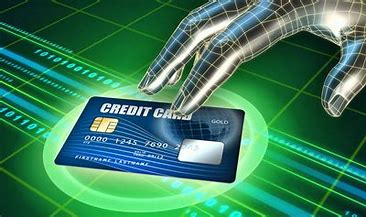

In [33]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [34]:
# read in data
df=pd.read_csv('CreditCardFraud.csv')

## Investigating data

In [35]:
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [36]:
df.shape

(1048575, 23)

In [37]:
print(min(df['trans_date_trans_time'])); print(max(df['trans_date_trans_time']));

1/1/2019 0:00
9/9/2019 9:59


In [38]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cc_num,1048575.0,4.171800e+17,1.308893e+18,6.041621e+10,1.800000e+14,3.520000e+15,4.640000e+15,4.990000e+18
amt,1048378.0,7.028055e+01,1.599551e+02,1.000000e+00,9.650000e+00,4.745000e+01,8.306000e+01,2.894890e+04
zip,1048575.0,4.880159e+04,2.689804e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1048575.0,3.853336e+01,5.076852e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1048575.0,-9.022626e+01,1.375858e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1048575.0,8.905776e+04,3.024351e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1048575.0,1.344906e+09,1.019700e+07,1.325376e+09,1.336682e+09,1.344902e+09,1.354366e+09,1.362932e+09
merch_lat,1048575.0,3.853346e+01,5.111233e+00,1.902779e+01,3.472954e+01,3.936295e+01,4.195602e+01,6.751027e+01
merch_long,1048575.0,-9.022648e+01,1.377093e+01,-1.666712e+02,-9.689864e+01,-8.743923e+01,-8.023228e+01,-6.695090e+01
is_fraud,1048575.0,5.727773e-03,7.546503e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1048575 non-null  object 
 1   cc_num                 1048575 non-null  float64
 2   merchant               1048575 non-null  object 
 3   category               1048575 non-null  object 
 4   amt                    1048378 non-null  float64
 5   first                  1048575 non-null  object 
 6   last                   1048575 non-null  object 
 7   gender                 1048575 non-null  object 
 8   street                 1048575 non-null  object 
 9   city                   1048575 non-null  object 
 10  state                  1048575 non-null  object 
 11  zip                    1048575 non-null  int64  
 12  lat                    1048575 non-null  float64
 13  long                   1048575 non-null  float64
 14  city_pop          

In [41]:
# Check if there are duplicated rows
print(df.duplicated().sum())

0


In [42]:
# Check if there are missing values
print(df.isnull().sum())

trans_date_trans_time      0
cc_num                     0
merchant                   0
category                   0
amt                      197
first                      0
last                       0
gender                     0
street                     0
city                       0
state                      0
zip                        0
lat                        0
long                       0
city_pop                   0
job                        0
dob                        0
trans_num                  0
unix_time                  0
merch_lat                  0
merch_long                 0
is_fraud                   0
dtype: int64


In [43]:
# Percentagae amt column missing value
(df['amt'].isnull().sum() / df.shape[0]) * 100

0.018787401950265837

In [44]:
# Replace mssing values of amt using mean of amt
#df ['amt'] = df ['amt'].fillna(df ['amt'].mean()) 
#df['amt'].isnull().sum()

Text(0.5, 1.0, 'BoxPlot of Fraudulent Transaction Amout')

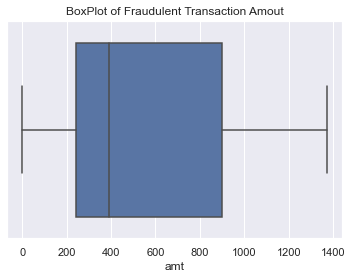

In [45]:
# Transaction amount when transaction is fraud
sns.boxplot(data=df.loc[df['is_fraud']==1], x='amt') 
plt.title ('BoxPlot of Fraudulent Transaction Amout')

In [46]:
# Inversitgae the bottom 10 value of amt in boxplot
df['amt'].nsmallest(n=10)

21768    1.0
22762    1.0
23685    1.0
25146    1.0
34740    1.0
41725    1.0
49569    1.0
52655    1.0
53832    1.0
54942    1.0
Name: amt, dtype: float64

Fraudulent transactions: Q1 is over $200. Q3 is close to $900. The median of the amt is $400. 
It is right skewed,which means that most of data is on the small value side. There is no outlier.

In [47]:
print('Counts: Fraud vs. Non-Fraud')
print(df['is_fraud'].value_counts())
print('Percentages:Fraud vs. Non-Fraud')
print(round(df['is_fraud'].value_counts(normalize=True)*100, 2))

Counts: Fraud vs. Non-Fraud
0    1042569
1       6006
Name: is_fraud, dtype: int64
Percentages:Fraud vs. Non-Fraud
0    99.43
1     0.57
Name: is_fraud, dtype: float64


Text(0.5, 1.0, 'Fraud Percentage')

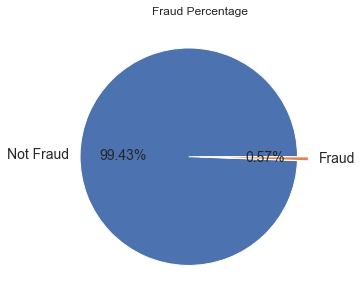

In [48]:
# Percentage of fraud -- pie chart
y=df['is_fraud'].value_counts(normalize=True)
x=np.array(y)
mylabels=["Not Fraud","Fraud"]
myexplode=[0.1,0]

fig=plt.figure(figsize=(5,5))
plt.pie(x,explode=myexplode,labels=mylabels,autopct='%.2f%%', textprops={'fontsize': 14})
plt.title("Fraud Percentage")

In [49]:
df['is_fraud'].describe()

count    1.048575e+06
mean     5.727773e-03
std      7.546503e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: is_fraud, dtype: float64

In [50]:
# Convert dob and trans_date_trans_time to datetime type
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
df['trans_date']=df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df['trans_date']=pd.to_datetime(df['trans_date'])
df['dob']=pd.to_datetime(df['dob'])

In [51]:
# Cacluate age on the transaction date
df["age"] = df["trans_date"]-df["dob"]
df["age"] = df["age"].astype('timedelta64[Y]') #unit: year

In [52]:
df.age.describe().round(2)

count    1048575.00
mean          45.39
std           17.38
min           13.00
25%           32.00
50%           43.00
75%           56.00
max           95.00
Name: age, dtype: float64

In [53]:
# Calculate distance from customer location to merchant location 
df['distance'] = np.sqrt((df['merch_lat']-df['lat'])**2 +(df['merch_long']-df['long'])**2)*69.17  #unit: mile

In [54]:
# Drop unnecessary columns
df = df.drop(['unix_time', 'dob', 'merch_lat', 'merch_long', 'lat', 'long'], axis=1)
print(df.columns); print(df.shape)

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'city_pop',
       'job', 'trans_num', 'is_fraud', 'trans_date', 'age', 'distance'],
      dtype='object')
(1048575, 19)


### EDA

Text(0.5, 1.0, 'Hour per Day: Fraud vs. Normal')

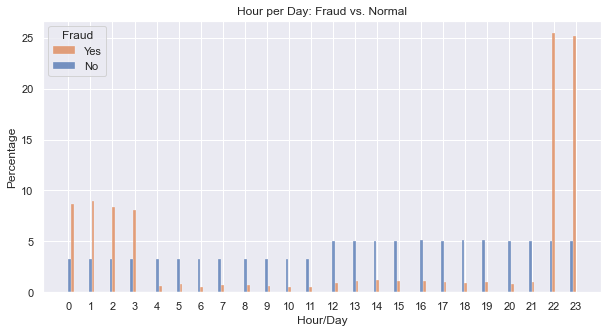

In [55]:
# Hour per day vs. is_fraud

df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
plt.figure(figsize=(10,5))
ax=sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Hour/Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Fraud', labels=['Yes', 'No'])
plt.title('Hour per Day: Fraud vs. Normal')

Fraudulent transactions occured the time when people were normally in deep sleep.

Text(0.5, 1.0, 'Weekday: Fraud vs. Normal')

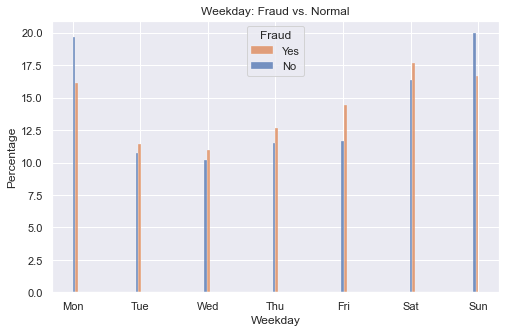

In [56]:
# weekday vs is_fraud

df['weekday']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
plt.figure(figsize=(8,5))
ax=sns.histplot(data=df, x="weekday", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Weekday')
ax.set_xticklabels(["", "Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.legend(title='Fraud', labels=['Yes', 'No'])
plt.title('Weekay vs. Fraud')
plt.title('Weekday: Fraud vs. Normal')

Regardless of being fraud or not, there were more transactions from Saturday to Monday. Need to especially moniotor unusal/suspicious transactions during these weekdays.

Text(0.5, 1.0, 'Month: Fraud vs. Normal')

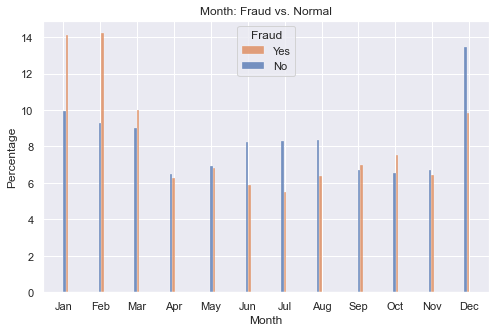

In [57]:
# Month vs is_fraud

df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month
plt.figure(figsize=(8,5))
ax=sns.histplot(data=df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Fraud', labels=['Yes', 'No'])
plt.title('Month: Fraud vs. Normal')

Fraudulent transactions occured more in January and February.

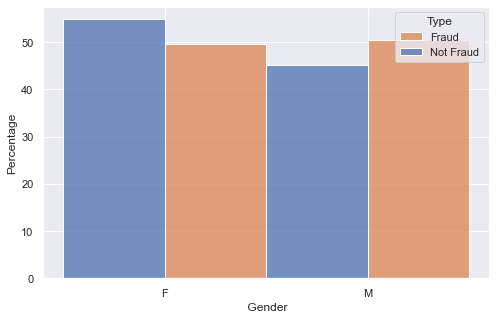

In [58]:
fig=plt.figure(figsize=(8,5))
ax=sns.histplot(data=df, x='gender',hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel(' Gender')
plt.legend(title='Type',labels=['Fraud','Not Fraud'])

percentages
gas_transport     10.149965
grocery_pos        9.527788
home               9.496507
shopping_pos       8.998212
kids_pets          8.716973
shopping_net       7.524402
entertainment      7.246120
food_dining        7.061107
personal_care      7.009322
health_fitness     6.614882
misc_pos           6.150442
misc_net           4.871564
grocery_net        3.501800
travel             3.130916
Name: category, dtype: float64


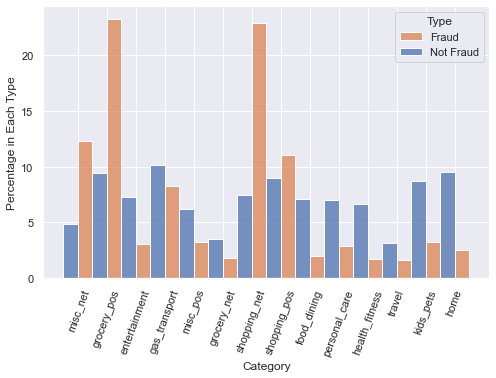

In [59]:
#Sepnding Category vs. is_fraud
print('percentages'); print(df['category'].value_counts(normalize=True)*100)

fig=plt.figure(figsize=(8,5))
ax=sns.histplot(x='category',data=df,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Category')
for tick in ax.get_xticklabels():
    tick.set_rotation(70)
plt.legend(title='Type',labels=['Fraud','Not Fraud'])
plt.show()

Fraudulent transactions occured more in grocery_pos and shopping_pos.       

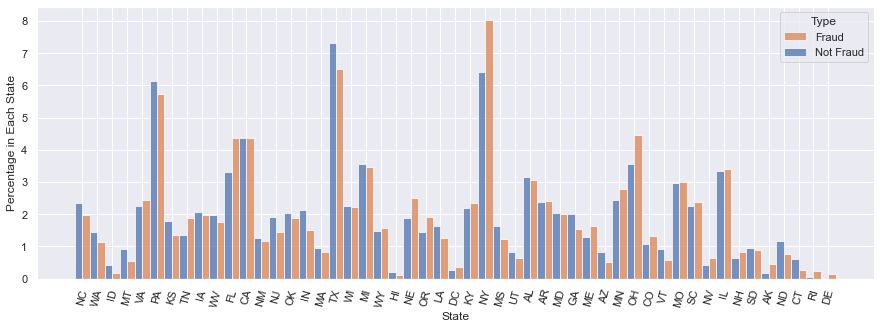

In [60]:
# State vs. is_fraud
#print('percentages'); print(df['state'].value_counts(normalize=True)*100)

fig=plt.figure(figsize=(15,5))
ax=sns.histplot(x='state',data=df,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
sns.set(rc={'xtick.labelsize':11})
ax.set_ylabel('Percentage in Each State')
ax.set_xlabel('State')
for tick in ax.get_xticklabels():
    tick.set_rotation(75)
plt.legend(title='Type',labels=['Fraud','Not Fraud'])

There were more fraudulent transactions in PA, TX, and NY. Meanwhile, the three states have big population.        

In [61]:
# City vs. Fraud

df['location']=df['city']+','+df['state']  # some state have the same city name
num_cities=df[df["is_fraud"]==1]['location'].nunique()
num_cities

581

In [62]:
# data frame only includes fraudulent transactions
df_fraud=df[df['is_fraud']==1]

In [63]:
# Top 10 cities in fraudulent transactions
#num_cities=df_fraud['location'].nunique()
df_fraud['location'].value_counts().nlargest(n=10)

Naples,FL           29
Dallas,TX           27
Detroit,MI          26
San Antonio,TX      25
Albuquerque,NM      24
Aurora,CO           23
New York City,NY    23
Warren,MI           23
Houston,TX          22
Lakeland,FL         21
Name: location, dtype: int64

In [64]:
# Top 10 Occupations in fraudulent transactions
#num_jobs=df_fraud['job'].nunique()
df_fraud['job'].value_counts().nlargest(n=10)

Materials engineer                       50
Surveyor, land/geomatics                 50
Exhibition designer                      44
Financial trader                         43
Mechanical engineer                      41
Private music teacher                    41
Naval architect                          38
Senior tax professional/tax inspector    37
Television/film/video producer           37
Trading standards officer                37
Name: job, dtype: int64

count    6006.000000
mean       53.050242
std        19.431455
min         0.460533
25%        39.293388
50%        55.187630
75%        67.447413
max        95.810320
Name: distance, dtype: float64


Text(0.5, 1.0, 'Distribution of Fraudulent Transaction Distance from Registration Location')

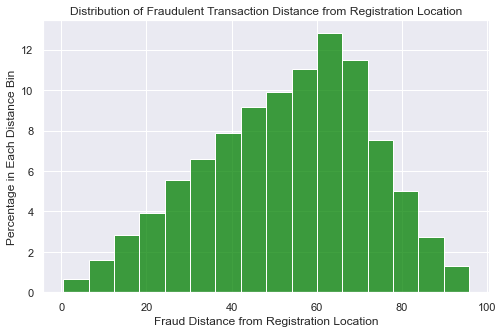

In [65]:
#Fraulent Transactin Distance from Registration Location

print(df_fraud['distance'].describe());

fig=plt.figure(figsize=(8,5))
ax=sns.histplot(data=df_fraud, x='distance', bins=16, stat='percent', color='green')
ax.set_ylabel('Percentage in Each Distance Bin')
ax.set_xlabel('Fraud Distance from Registration Location')
plt.title('Distribution of Fraudulent Transaction Distance from Registration Location')

Most fraudulent transactions occured around 50 - 70 miles in terms of fraulent transaction distance from registration location

Text(0.5, 1.0, 'Distribution of Age on Fraudulent Transactions')

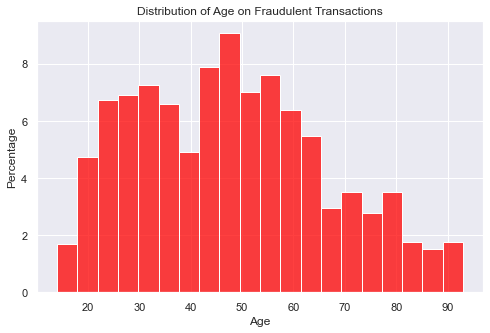

In [66]:
plt.figure(figsize=(8,5))
ax=sns.histplot(data=df_fraud, x="age", bins=20, stat='percent', color='red')
ax.set_ylabel('Percentage')
ax.set_xlabel('Age')
plt.title('Distribution of Age on Fraudulent Transactions')

Most fraudulent transactions occured 25-35 yrs old and 45-55 yrs old. 

Text(0.5, 1.0, 'Distribution of Fraudulent Transaction Amount')

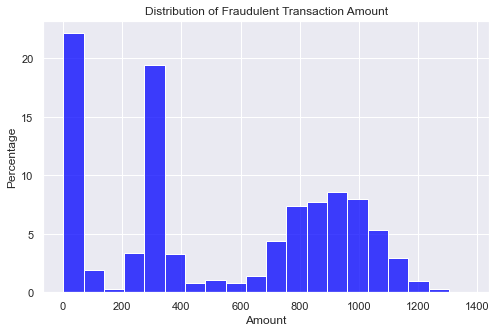

In [67]:
plt.figure(figsize=(8,5))
ax=sns.histplot(data=df_fraud, x="amt", bins=20, stat='percent', color='blue')
ax.set_ylabel('Percentage')
ax.set_xlabel('Amount')
plt.title('Distribution of Fraudulent Transaction Amount')

In [68]:
df_fraud[df_fraud['amt']<40]['amt'].count()/len(df_fraud)

0.20945720945720947

The highest percentage of fraudulent transaction amount is in low dollar range(e.g., $1 - $40). The second higest perentage of fraudulent transaction amount is around $300. 